# **America's favourite grocery store? Predicting Walmart sales between 2012-2014**


### Patricio Hernandez Senosiain
---

## Contents

> [1 - Introduction](#1---Introduction)
> 
> [2 - Importing dependencies](#2---Importing-dependencies)
> 
> [3 - Data retrieval and exploratory analysis](#3---Data-retrieval-and-exploratory-analysis)
> 
> [4 - Data cleaning and preprocessing](#4---Data-cleaning-and-preprocessing)
> 
> [5 - Modelling](#5---Modelling)
> 
> [6 - Final predictions and submission](#6---Final-predictions-and-submission)


## 1 - Introduction

## 2 - Importing dependencies

In [18]:

# Importing libraries and modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Declaring standard Seaborn color palette
standard_palette = []
for i in range(10):
    standard_palette += list(sns.color_palette('muted')) 
    

## 3 - Data retrieval and exploratory analysis


> [3.1 - Data retrieval](#3.1---Data-retrieval)
> 
> [3.2 - General overview](#3.2---General-overview)
> 
> [3.3 - Distribution of target variable](#3.3---Distribution-of-target-variable)
> 
> [3.4 - Distribution of features](#3.4---Distribution-of-features)
>
> [3.5 - Bivariate analysis of numerical features](#3.5---Bivariate-analysis-of-numerical-features)
> 
> [3.6 - Correlation between features](#3.6---Correlation-between-features)
> 
> [3.7 - Overview of missing values](#3.7---Overview-of-missing-values)
> 

### 3.1 - Data retrieval

In [19]:

# Retrieving datasets
stores = pd.read_csv('data/stores.csv')
features = pd.read_csv('data/features.csv')
train = pd.read_csv('data/train.csv')


### 3.2 - General overview

In [20]:
stores.info()
print('')
stores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB



,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [21]:
features.info()
print('')
features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB



,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [22]:
train.info()
print('')
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB



,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [23]:

# Merging datasets
data = train.merge(features, how='left', on=['Store', 'Date'])
data = data.merge(stores, how='left', on='Store' )
data.info()
print('')
data.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


### 3.4 - Distribution of target variable

In [24]:
# Separating target variable
target = data['Weekly_Sales']

# Plotting summary statistics
target.describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

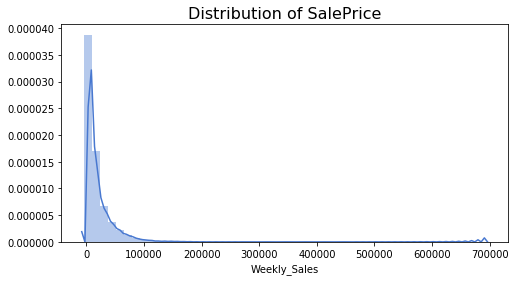

In [25]:

# Plotting distribution of values for target variable
plt.figure(figsize=(8,4))
sns.distplot(target, color=standard_palette[0])
plt.title('Distribution of Weekly Sales', size=16)
plt.show()

In [ ]:
i = 1
fig = plt.figure(figsize=(10,8))
for key in datasets:
    dataset = datasets[key]
    fig.add_subplot(2,2,i, title= "Figure {}: ".format(i) + key + " stock price (Oct.2019 - Oct.2020)")
    ax = sns.lineplot(data=dataset, y="Price ($USD)", x="Time", color=standard_palette[i-1])
    ax = ax.xaxis.set_tick_params(bottom=False, labelbottom=False)
    ax
    i+=1
    
plt.tight_layout()
plt.show()

## 4 - Data cleaning and preprocessing

## 5 - Modelling

## 6 - Final predictions and submission